# <span style="color:goldenrod"> **Tarea Examen 2 Física Computacional**</span>
#### Dehesa Corona Valeria Carolina
*Elaborado en Jupyter Notebook*


#### Bibliotecas adicionales:

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from pylab import *
from numpy import exp,arange
#Gráficas del 3er ejercicio
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

**$1$. Se tiene un oscilador armónico en dos dimensiones ($xy$) en el que la fuerza está dada por $\vec{F} = −k\vec{r}$ y
se tiene una fricción $\vec{f}_{fric} = −γ\vec{v}$ si $|\vec{v}| \leq 1$, pero cuando $|\vec{v}| > 1$ la fricción es $\vec{f}_{fricc} = −µv^{3/2}\hat{v}$. Si $m = 1$, $k = 1$, $\gamma = 0.1$ y $\mu = 0.2$, resuelva los siguientes ejercicios:**

**(a) Encuentre las ecuaciones de movimiento en coordenadas cartesianas. No es necesario resolver las
ecuaciones.**


Por segunda ley de Newton: $F = ma$. Por lo que, tomando la primera coordenada de $\vec{r} = (x, y)$

$$
\sum{F_{x}} = ma = m\ddot{x}  \\
$$

Análogo para $y$. Ahora, analizando el movimiento del sistema notamos que:

$$
m\ddot{x} = -k x - (\vec{f}_{fric})  \\
$$


Por hipótesis, tenemos definida la fricción:

$$
\vec{f}_{fric}(x)= \left\{ \begin{array}{lcc}
             -\gamma \dot{x} &   si  & |v| \leq 1 \\
             \\ -\mu \dot{x}^{-3/2} &  si & |v| > 1 \\
             \end{array}
   \right.
$$

Tengamos en cuenta que: 
$$
\vec{r} = x+y \\
\vec{\dot{r}} = \dot{x}+\dot{y}
$$


Nos quedan dos casos:

Para $|\vec{v}| \leq 1$:
$$
-k(x+y)+γ(\dot{x}+\dot{y})= m(\ddot{x}+\ddot{y})\\
\Rightarrow k(x+y)-γ(\dot{x}+\dot{y})+m(\ddot{x}+\ddot{y})=0
$$

Dividimos en eje x y eje y; despejamos para la aceleración en cada uno:
$$
\frac{k}{m}(x)-\frac{γ}{m}(\dot{x})=\ddot{x}\\
\frac{k}{m}(y)-\frac{γ}{m}(\dot{y})=\ddot{y}
$$



Para $|\vec{v}| > 1$:
$$
-k(x+y)+µ(\dot{x}+\dot{y})^{\frac{3}{2}}= m(\ddot{x}+\ddot{y})\\
\Rightarrow k(x+y)-µ(\dot{x}+\dot{y})^{\frac{3}{2}}+m(\ddot{x}+\ddot{y})=0
$$
Dividimos en eje x y eje y:
$$
\frac{k}{m}(x)-\frac{µ}{m}(\dot{x})^{\frac{3}{2}}=\ddot{x}\\
\frac{k}{m}(y)-\frac{µ}{m}(\dot{y})^{\frac{3}{2}}=\ddot{y}
$$
___


**(b) Utilice el método de Runge-Kutta de 4to orden para encontrar la solución a las ecuaciones de movimiento en el inciso anterior con condiciones iniciales $\vec{r}_0 = (0, 1)$ y $\vec{v}_0 = (cos(\theta),sin(\theta))$, donde $\theta = \frac{n\pi}{6}$ con $n = 0, 1, 2, 3, ..., 10, 11$.**

In [2]:
def Oscilador(sis, t, valo=[1, 1, 0.1, 0.2]):
    # sis = [dx,dy,x,y]
    # valo = [m, k, gamma, mu]
    
    dx = sis[0]
    dy = sis[1]
    m = valo[0]
    k = valo[1]
    g = valo[2]
    mu = valo[3]
    
    vel = (sis[0]*sis[0]+sis[1]*sis[1])**0.5
    
    if vel>1: 
        ddx = -k/m * sis[2] -mu/m * (vel)**(0.25) * sis[0]
        ddy = -k/m * sis[3] -mu/m * (vel)**(0.25) * sis[1]
        
    else:
        ddx = -k/m * (sis[2]) -g/m * (sis[0])
        ddy = -k/m * (sis[3]) -g/m * (sis[1])
        
    return (np.array([ddx, ddy, dx, dy], dtype=np.float))


In [3]:
#Runge-Kutta de 4to Orden
def RK_4(edo,x_ini,t):
    sol = zeros( (len(t) , len(x_ini)) )
    sol[0,:] = x_ini
    delta = t[1]-t[0]
    for i in range(0,len(t)-1):
        k1 = edo(sol[i,:],t[i])
        k2 = edo(sol[i,:] + 0.5*delta*k1 , t[i] + 0.5*delta)
        k3 = edo(sol[i,:] + 0.5*delta*k2 , t[i] + 0.5*delta)
        k4 = edo(sol[i,:] + delta*k2 , t[i] + delta)
        sol[i+1,:] = sol[i,:] + (delta/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    return sol

Definimos ciclos para todas las condiciones iniciales mencionadas y tiempo:


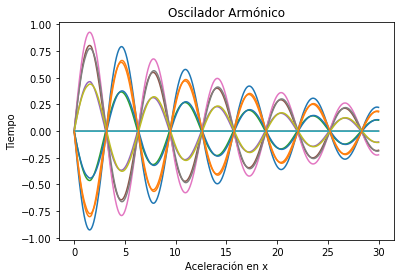

In [4]:
tiempo = arange(0, 30, 0.01)
for n in range(12):
    sol = RK_4(Oscilador,[0,1,cos(n*pi/6),sin(n*pi/6)],tiempo)
    plt.plot(tiempo, sol[:,0])
    plt.title('Oscilador Armónico')
    plt.xlabel('Aceleración en x')
    plt.ylabel('Tiempo')
    


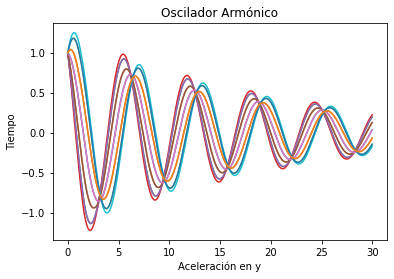

In [5]:
for n in range(12):
    sol = RK_4(Oscilador,[0,1,cos(n*pi/6),sin(n*pi/6)],tiempo)
    plt.plot(tiempo, sol[:,1])
    plt.title('Oscilador Armónico')
    plt.xlabel('Aceleración en y')
    plt.ylabel('Tiempo')

**(c) Genere una función que calcule la energía para las distintas condiciones iniciales y detenga la
simulación cuando ésta sea menor al $30$% de su valor inicial. Cabe mencionar que debe hacer su
simulación (paso de integración) de tal manera que el error en la trayectoria no tenga variaciones
de más del $1$ %, es decir se debe asegurar convergencia a la solución con error de a lo mas $1$ %.**

Como la energía del sistema es la suma de la energía cinética y potencial:
$$
E = T + U = \frac{1}{2}m\vec{v}^2 + \frac{1}{2}k\vec{r}^2
$$
Por lo que al descomponer en sus componentes tenemos:
$$
E = \frac{1}{2}m (v_x^2+v_y^2) + \frac{1}{2}k(x^2+y^2)
$$
Integramos velocidades de $x$ y $y$:


In [6]:
def int_alg1(x,y):                                               
    pre_integral = 0#Inicializamos variable para valor punto a punto
    h = x[1] -x[0]  #longitud del intervalo 
    integral = np.zeros(len(y))
    #Arreglo de las integrales
    integral[0] = pre_integral + 0.5*( 17*y[0] + 7*y[1] + y[2] - y[3] )#Primer punto de la función
    integral[-1] = pre_integral + 0.5*( 17*y[-1] + 7*y[-2] + y[-3] - y[-4] )#Último punto de la función
    for i in range(1,len(y)-1):                                 
        pre_integral = pre_integral + y[i+1] + 22*y[i] + y[i-1] #Todos los puntos intermedios
        integral[i] = pre_integral                            
    return integral*(h/24)                                      

In [7]:
def energia(sol, tiempo):
    
    #Masa y Constante de Resorte por hipótesis
    m = 1 
    k = 1
    
    #Energía Cinética
    T = np.zeros(sol.shape[0])
    for i in range(sol.shape[0]):
        T[i] = 1/2 * m * (np.power(sol[i,2],2)+ np.power(sol[i,3], 2))
        
    #Energía Potencial
    U = np.zeros(sol.shape[0])
    #Ahora integraremos las velocidades
    x = int_alg1(sol[:,2], tiempo) # r
    y = int_alg1(sol[:,3], tiempo)
    for i in range(sol.shape[0]):
        U[i] = 1/2 * k * (np.power(x[i],2)+np.power(y[i],2))
    
    #Sumamos para obtener energía total
    E = np.zeros(sol.shape[0])
    for i in range(sol.shape[0]):
        E[i] = T[i] + U[i]
    
    
    #Valor inicial para revisar condición de 30%
    E_0 = E[0]
    
    
    #Buscamos donde la energía es menor o igual al 30%
    Valor = E_0 * 30 / 100
    for i in range(sol.shape[0]):
        if Valor > E[i]:
            print("Se alcanza en el paso %d el valor de: " %i)
            print(E[i])
            break
        else: 
            print(E[i])
            
energia(sol,tiempo)

0.5000000000783842
0.49500445427759127
0.49002055972084707
0.48504994935404644
0.48009427409691535
0.4751552031700554
0.47023442351594846
0.46533363922778237
0.4604545709862988
0.4555989555048597
0.4507685449829243
0.44596510656812427
0.44119042182711665
0.43644628622539394
0.4317345086162216
0.42705691073887014
0.42241532672630333
0.41781160262247974
0.41324759590941773
0.40872517504417105
0.40424621900585644
0.39981261685286795
0.3954262672904088
0.39108907824846767
0.38680296647035706
0.3825698571119307
0.37839168335158846
0.37427038601117346
0.37020791318786056
0.366206219897129
0.36226726772690976
0.3583930245029885
0.35458546396574325
0.35084656545829024
0.3471783136261033
0.34358269812817066
0.3400617133597461
0.3366173581867451
0.3332516356918336
0.3299665529322497
0.32676412070939664
0.3236463533502352
0.320615268500504
0.3176728869297872
0.31482123234844644
0.3120623312364272
0.309398212683945
0.30683090824405473
0.3043624517970953
0.30199487942700426
0.299730229309487
0.2975

**(d) Dibuje las gráficas del momento angular para los casos anteirores en el inciso (1b).**

In [8]:
#Creamos los vectores de posición (r) justo como en la función energía
x = int_alg1(sol[:,2], tiempo)
y = int_alg1(sol[:,3], tiempo)
r = np.zeros([len(x),3])
for i in range(len(x)):
    r[i,0] = x[i]
    r[i,1] = y[i]
print(r)

[[-5.40904852e-08  1.25206041e-05  0.00000000e+00]
 [-4.32723882e-07  1.00164833e-04  0.00000000e+00]
 [-1.29817165e-06  3.00494499e-04  0.00000000e+00]
 ...
 [-1.94401334e+00  4.49990813e+02  0.00000000e+00]
 [-1.94531064e+00  4.50291108e+02  0.00000000e+00]
 [-6.48815370e-04  1.50184647e-01  0.00000000e+00]]


**$2$. Suponga que se tiene el sistema como en el problema anterior, pero ahora la partícula tiene carga $q > 0$ y en el origen también se encuentra una partícula de carga $q > 0$.**

**(a) Sin considerar la fricción, ¿El sistema puede tener órbitas cerradas?. De ser así, encuentre algunas de estas órbitas o muestre que el sistema no puede tener este tipo de órbitas. (Apoye sus argumentos con alguna simulación).**


**(b) Considerando fricción, ¿El sistema puede tener órbitas cerradas?. De ser así, encuentre algunas de
estas órbitas o muestre que el sistema no puede tener este tipo de órbitas. (Apoye sus argumentos
con alguna simulación).**

Tenemos las ecuaciones encontradas en el primer ejercicio:

Para $|\vec{v}| \leq 1$:
$$
\frac{k}{m}x-\frac{γ}{m}\dot{x}=\ddot{x}\\
\frac{k}{m}y-\frac{γ}{m}\dot{y}=\ddot{y}
$$


Para $|\vec{v}| > 1$:
$$
\frac{k}{m}x-\frac{µ}{m}\dot{x}^{\frac{3}{2}}=\ddot{x}\\
\frac{k}{m}y-\frac{µ}{m}\dot{y}^{\frac{3}{2}}=\ddot{y}
$$

La fuerza electromagnética de Coulomb, dada por:
$$
\vec{F}_e=K\frac{q^2}{r^2}\hat{r}=K\frac{q^2}{r^3}\vec{r}
$$
Donde $K=9x10^9N\frac{m^2}{C^2} \quad \rightarrow$ Constante de Coulomb

Comenzamos, para este caso, ignorando la fricción e introduciendo la fuerza eléctrica:
$$
F_{total} = \vec{F}+\vec{F_e}=-k\vec{r}+K\frac{q^2}{r^3}\vec{r}=m\ddot{\vec{r}}
$$

Despejamos para $\ddot{\vec{r}}$:
$$
\ddot{\vec{r}}=-\frac{k}{m}\vec{r}+\frac{K}{m}\frac{q^2}{r^3}\vec{r}
$$
___

In [18]:
def oscilador_carga(sis, t, valo=[10, 9, 1*10**-10]):
    #donde  sis = [dx,dy,x,y]
    # valo = [m, k, q]
    
    dx = sis[0]
    dy = sis[1]
    m = valo[0]
    k = valo[1]
    q = valo[2]
    cou = (9*10)**9
    
    r = (float(sis[3])**2+float(sis[2])**2)**0.5
    
    ddx = -k/m * sis[2] + cou/m * (q**2/r**3) * sis[2]
    ddy = -k/m * sis[3] + cou/m * (q**2/r**3) * sis[3]
        
    return (np.array([ddx, ddy, dx, dy], dtype=np.float))

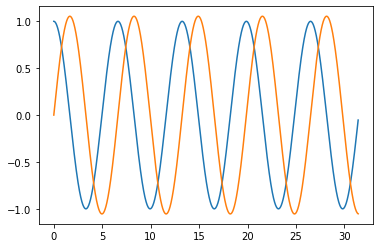

In [10]:
#Revisamos una solución y su comportamiento:
tiempo_2a = np.arange(0,10*pi,0.01)
sol2_a = RK_4(oscilador_carga,[0,1,1,0],tiempo_2a)
plt.plot(tiempo_2a, sol2_a[:,-2:])


Necesitamos que el sistema esté en equilibrio para considerar órbitas cerradas. Por lo que:

$$
F_{total} = \vec{F}+\vec{F_e}=-k\vec{r}+K\frac{q^2}{r^3}\vec{r}=0
\Rightarrow k\vec{r}=K\frac{q^2}{r^3}\vec{r}
\Rightarrow k=K\frac{q^2}{r^3}
$$
Ahora despejamos $r$:

$$
r = \left(\frac{Kq^2}{k} \right)^{\frac{1}{3}}
$$

Que es la condición necesaria de $r$ para que las órbitas sean cerradas.

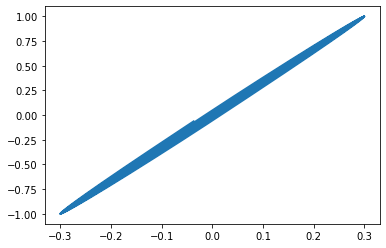

In [20]:
q = 1*10**-10
k = 9*10**9
sol2_a2 = RK_4(oscilador_carga,[0,(q*k)**1/3,1,0],tiempo_2a)
plt.plot(sol2_a2[:,1], sol2_a2[:,2])

**$3$. Se tiene la siguiente función:**

$$ f(x,y) = 2e^{-(x+1)^2} (e^{-(y+2)^2} + e^{-(y-2)^2}) + 6x(x^2+y^2)e^{-(x^2+y^2)}-1 $$


**Encuentre los puntos $(\tilde{x}, \tilde{y})$ tales que $f(\tilde{x}, \tilde{y}) = 0$ y dibuje estos puntos en el plano $xy$**


**Hint: Como podrá notar los puntos a buscar se encuentran en la región $x, y \in (−4, 4) \times (−4, 4)$. Una forma de obtener
los puntos es haciendo un barrido para $x$ fija y encontrando todas las raíces de la ecuación en términos de $y$. Entre más fino haga el barrido, la curva de nivel que se encuentre será mejor.**


Queremos encontrar los puntos $(x,y)$ donde $f(x,y)=0$ para :

$$f(x,y)=2e^{-(x + 1)^{2}}(e^{-(y+2)^{2}} + e^{-(y-2)^{2}}) + (6x(x^{2} + y^{2})(e^{-(x^{2} + y^{2})})-1$$

Primero visualizamos la gráfica en el intervalo mencionado en el hint:

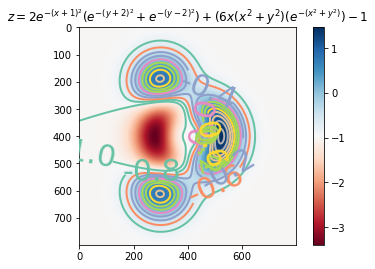

In [21]:
# Función ejercicio 3
def z_func(x,y):
    return 2 * (np.exp(-(x + 1)**2)) * (np.exp(-(y+2)**2) + np.exp(-(y-2)**2)) + (6*(x)*(x**2 + y**2)*(np.exp(-(x**2 + y**2)))) -1

 
x = arange(-4.0,4.0,0.01)
y = arange(-4.0,4.0,0.01)
X,Y = meshgrid(x, y) # malla de puntos
Z = z_func(X, Y) # evaluamos la función en dicha malla

im = imshow(Z,cmap=cm.RdBu) # dibujamos la función
#líneas de contonrno y sus etiquetas
cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=30)
colorbar(im) # barra de profundidad a la derecha
# latex de la función
title('$z=2e^{-(x + 1)^{2}}(e^{-(y+2)^{2}} + e^{-(y-2)^{2}}) + (6x(x^{2} + y^{2})(e^{-(x^{2} + y^{2})})-1$')
show()

Queremos describir mediante algun método numérico las curvas de color rosa claro.

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

Utilizamos el método de bisección fijando una variable
    

In [ ]:
'''Esta funcion implementa el metodo de la biseccion
para encontrar la raiz de una funcion.
f:   funcion de la cual se busca la raiz
Tol: tolerancia del error numerico
N:   numero maximo de iteraciones
a:   limite inferior del rango inicial
b:   limite superior del rango inicial
'''
def biseccion(f,Tol,N,a,b):
    fa, fb = f(a), f(b)
    #no hay un cambio de signo (teorema del valor medio)
    #no existe raiz en el intervalo [a,b]
    if fa*fb>0:
        print ("no hay raiz en [a,b]")
        return
    #contador de iteraciones    
    n=1
    x0=0.0
    #mientras no se exceda el numero de iteraciones
    while n<=N:
        #se busca la raiz en el punto medio
        x1=(a+b)/2.0
        fx=f(x1)
        #en caso de que la iteracion siguiente y la diferencia
        #entre la iteracion anterior no excedan Tol, entonces
        #la iteracion actual se aproxima a la solucion buscada
        if abs(f(x1)) <= Tol and abs(x1-x0) <= Tol:
            return x1
        #en caso de no cumplir el criterio de tolerancia
        #se actualiza el rango de busqueda
        if (fa*fx <0.0):
            b=x1 
        if (fx*fa >0.0):      
            a=x1
        x0=x1
        #se incrementa el contador de iteraciones
        n=n+1



Intenté hacer un "barrido" de $x$, fijando $y$ y dando oportunidad mediante un ciclo a variar los valores de $y$, pero no fue suficiente para que aparecieran las raíces. Hasta aquí llegué.

In [17]:
def ciclo():
    x = np.linspace(-4,4, 100000)
    M = []
    
    for i in x:
        
        def f_i(y):
            return 2 * (np.exp(-(i + 1)**2)) * (np.exp(-(y+2)**2) + np.exp(-(y-2)**2)) + (6*(i)*(i**2 + y**2)*(np.exp(-(i**2 + y**2)))) -1
        
        M.append(biseccion(f_i,0.1,1000,-4,4))
    return M

print(ciclo())


no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz en [a,b]
no hay raiz e